In [1]:
# import the necessary packages
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import argparse
import cv2
import os
from matplotlib import pyplot as plt
from deepface import DeepFace
from deepface import DeepFace

[INFO] loading face detector model...
[INFO] loading face acne detector model...
[INFO] computing face detections...
1/1 [==============================] - 2s 2s/step


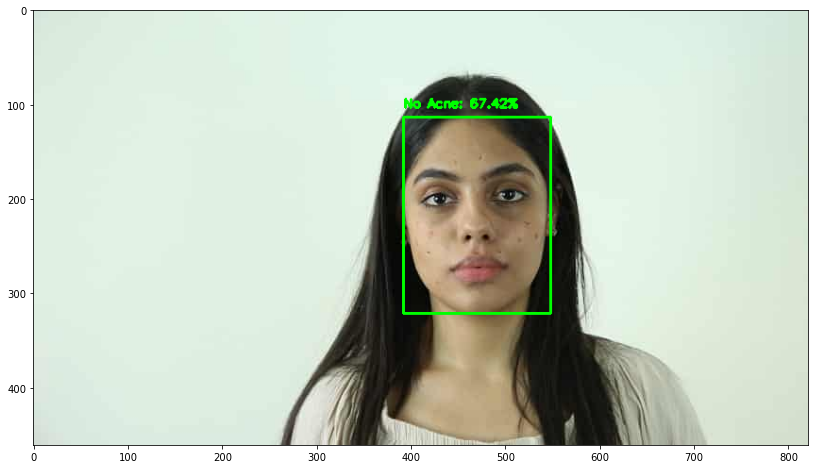

Action: race: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:07<00:00,  1.75s/it]


[{'emotion': {'angry': 7.183029171464739e-09, 'disgust': 1.6052313024620562e-13, 'fear': 0.00012097488024664926, 'happy': 0.0006572991878783796, 'sad': 1.1928774767966388e-05, 'surprise': 0.00022724145765096182, 'neutral': 99.99898672103882}, 'dominant_emotion': 'neutral', 'region': {'x': 368, 'y': 119, 'w': 199, 'h': 199}, 'age': 35, 'gender': {'Woman': 26.1595219373703, 'Man': 73.84047508239746}, 'dominant_gender': 'Man', 'race': {'asian': 0.8502877317368984, 'indian': 5.518799275159836, 'black': 0.1620895811356604, 'white': 41.4748340845108, 'middle eastern': 43.0207759141922, 'latino hispanic': 8.973217755556107}, 'dominant_race': 'middle eastern'}]
[INFO] computing face detections...
1/1 [==============================] - 0s 265ms/step


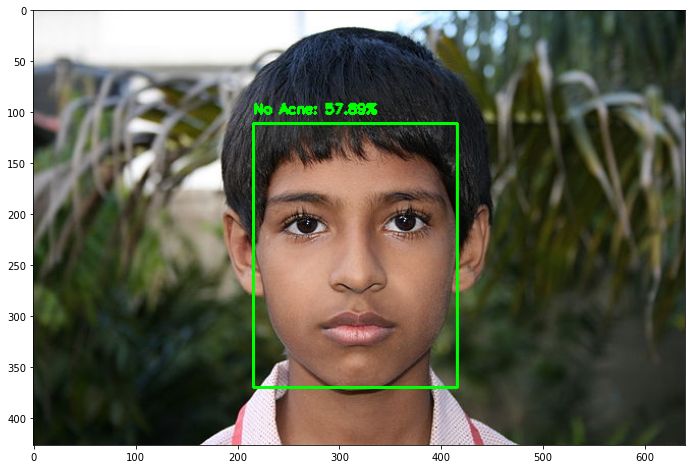

Action: race: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.52it/s]


[{'emotion': {'angry': 0.0008980884558695834, 'disgust': 3.72582794321973e-15, 'fear': 0.0024354116249014623, 'happy': 2.0089347074758734e-06, 'sad': 0.06362767308019102, 'surprise': 2.6434952005160994e-07, 'neutral': 99.93304014205933}, 'dominant_emotion': 'neutral', 'region': {'x': 200, 'y': 120, 'w': 234, 'h': 234}, 'age': 25, 'gender': {'Woman': 0.4291372839361429, 'Man': 99.57085847854614}, 'dominant_gender': 'Man', 'race': {'asian': 0.6718032527714968, 'indian': 92.0937716960907, 'black': 1.5391506254673004, 'white': 0.22170436568558216, 'middle eastern': 0.13124749530106783, 'latino hispanic': 5.342315137386322}, 'dominant_race': 'indian'}]
[INFO] computing face detections...
1/1 [==============================] - 0s 133ms/step


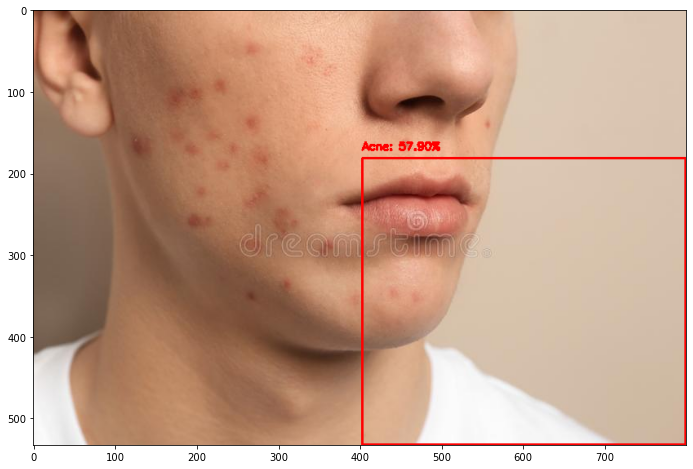

Action: race: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.79it/s]


[{'emotion': {'angry': 0.7342084776610136, 'disgust': 0.1519987592473626, 'fear': 0.6117009557783604, 'happy': 2.463657967746258, 'sad': 19.805629551410675, 'surprise': 0.015744793927296996, 'neutral': 76.21706128120422}, 'dominant_emotion': 'neutral', 'region': {'x': 0, 'y': 0, 'w': 800, 'h': 533}, 'age': 25, 'gender': {'Woman': 1.5202871523797512, 'Man': 98.47971200942993}, 'dominant_gender': 'Man', 'race': {'asian': 1.0704067535698414, 'indian': 0.0024235861928900704, 'black': 0.002400850826234091, 'white': 96.24491930007935, 'middle eastern': 0.6328009534627199, 'latino hispanic': 2.047053724527359}, 'dominant_race': 'white'}]
1/1 [==============================] - 0s 112ms/step


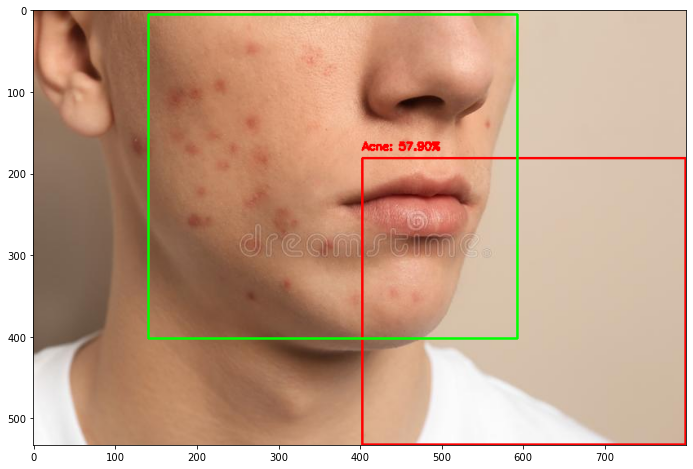

Action: race: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.71it/s]


[{'emotion': {'angry': 1.6507722437381744, 'disgust': 0.406781816855073, 'fear': 1.185578666627407, 'happy': 1.7142655327916145, 'sad': 38.9422208070755, 'surprise': 0.012592977145686746, 'neutral': 56.087785959243774}, 'dominant_emotion': 'neutral', 'region': {'x': 0, 'y': 0, 'w': 800, 'h': 533}, 'age': 25, 'gender': {'Woman': 2.011989802122116, 'Man': 97.9880154132843}, 'dominant_gender': 'Man', 'race': {'asian': 0.08180437725968659, 'indian': 0.0003327819285914302, 'black': 0.00012463325447242823, 'white': 99.04907941818237, 'middle eastern': 0.2726929495111108, 'latino hispanic': 0.5959710106253624}, 'dominant_race': 'white'}]


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [2]:

# load our serialized face detector model from disk
print("[INFO] loading face detector model...")
Path =r"C:\Users\SUMIT SINGH RAJPOOT\Downloads\acne-detection-model\acne-detection-master\face_detector\deploy.prototxt"
weightsPath =r"C:\Users\SUMIT SINGH RAJPOOT\Downloads\acne-detection-model\acne-detection-master\face_detector\res10_300x300_ssd_iter_140000.caffemodel"
net = cv2.dnn.readNet( weightsPath,Path)

# load the face mask detector model from disk
print("[INFO] loading face acne detector model...")
model = load_model(r"C:\Users\SUMIT SINGH RAJPOOT\Downloads\facemodel")

# load the input image from disk, clone it, and grab the image spatia


images_folder_path = r"C:\Users\SUMIT SINGH RAJPOOT\Downloads\acne-detection-model\acne-detection-master\acne_images"

# loop through each image in the folder
for image_file in os.listdir(images_folder_path):
    
    # read the image and get its dimensions
    image = cv2.imread(os.path.join(images_folder_path, image_file))
    (h, w) = image.shape[:2]

# construct a blob from the image
    blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300),(104.0, 177.0, 123.0))

# pass the blob through the network and obtain the face detections
    print("[INFO] computing face detections...")
    net.setInput(blob)
    detections = net.forward()

# loop over the detections
    for i in range(0, detections.shape[2]):
    # extract the confidence (i.e., probability) associated with
    # the detection
        confidence = detections[0, 0, i, 2]

    # filter out weak detections by ensuring the confidence is
# greater than the minimum confidence
        if confidence > 0.5:
            # compute the (x, y)-coordinates of the bounding box for
            # the object
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
#             if face is None:
#                 continue
            (startX, startY, endX, endY) = box.astype("int")

            # ensure the bounding boxes fall within the dimensions of
            # the frame
            (startX, startY) = (max(0, startX), max(0, startY))
            (endX, endY) = (min(w - 1, endX), min(h - 1, endY))

            # extract the face ROI, convert it from BGR to RGB channel
            # ordering, resize it to 224x224, and preprocess it
            face = image[startY:endY, startX:endX]
            if face is None:
                continue
            face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
            face = cv2.resize(face, (224, 224))
            face = img_to_array(face)
            face = preprocess_input(face)
            face = np.expand_dims(face, axis=0)
            

        # pass the face through the model to determine if the face
        # has a acne or not
            (acne, withoutAcne) = model.predict(face)[0]

            # determine the class label and color we'll use to draw
            # the bounding box and text
            label = "No Acne" if acne< withoutAcne else "Acne"
            color = (0, 0,255 ) if label == "Acne" else (0, 255, 0)

            # include the probability in the label
            label = "{}: {:.2f}%".format(label, max(acne, withoutAcne) * 100)

            # display the label and bounding box rectangle on the output
            # frame
            cv2.putText(image, label, (startX, startY - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
            cv2.rectangle(image, (startX, startY), (endX, endY), color, 2)

            # show the output image
            plt.figure(figsize=(15,8))
            plt.imshow((cv2.cvtColor(image, cv2.COLOR_BGR2RGB)))
            # plt.figure(figsize=(10,8))
            # plt.imshow(image)
            plt.show()
            predict=DeepFace.analyze(image , enforce_detection=False)
            print(predict)
